# Data Science Pipeline

1. Data processing
   - in Yuhao's another jupyter notebook
2. Data exploration
    - distribution of categorical/discrete numeric data
    - distribution of continuous numeric data
    - data cleaning
3. Feature engineering
4. Machine learning modles

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from scipy.special import boxcox1p
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Processing

## Join Data

Join below four tables using zip code.

**House data:** `cleaned_data.csv`

**School data:** `zip_num_school.csv`

**Crime data:** `zip_num_crime.csv`

**Company data:** `company_weighted_dist.csv`

In [43]:
# read data of houses
houses = pd.read_csv('cleaned_data.csv').drop('Unnamed: 0', axis=1)
houses.head()

bathstotal  beds   latitude   longitude  zipcode  \
0         0.0     0  37.804640 -122.405206    94111   
1         3.0     2  37.780431 -122.389276    94107   
2         2.0     0  37.798254 -122.417974    94109   
3         7.0     6  37.774411 -122.426291    94102   
4         1.0     2  37.778018 -122.507005    94121   

                             propclass saleTransDate  saleamt  universalsize  \
0            Condominium (residential)    2016-01-04   970000           1299   
1            Condominium (residential)    2016-01-04  1370000           1348   
2  Single Family Residence / Townhouse    2016-01-04  1710000            562   
3         "Duplex, Triplex, Quadplex)"    2016-01-04  2625000           3634   
4  Single Family Residence / Townhouse    2016-01-05   665000            660   

   yearbuilt  age_year        price  duplex  Apartment  condo  townhouse  
0       1993        23   746.728253       0          0      1          0  
1       2000        16  1016.320475       0          0      1          0  
2       1949        67  3042.704626       0          0      0          1  
3       1900       116   722.344524       1          0      0          0  
4       1916       100  1007.575758       0          0      0          1

In [44]:
print("numer of records:", len(houses))

numer of records: 4574


In [45]:
# missing value of house data
houses.isnull().sum()

bathstotal       0
beds             0
latitude         0
longitude        0
zipcode          0
propclass        0
saleTransDate    0
saleamt          0
universalsize    0
yearbuilt        0
age_year         0
price            0
duplex           0
Apartment        0
condo            0
townhouse        0
dtype: int64

In [7]:
school_df = pd.read_excel('School_Directory.xlsx')

In [9]:
school_df = school_df[['School', 'Entity Type', 'Public Yes/No', 'Street Address', 'Street City', 'Street Zip']].dropna(axis=0, how='any')
school_df.isnull().sum()

School            0
Entity Type       0
Public Yes/No     0
Street Address    0
Street City       0
Street Zip        0
dtype: int64

In [16]:
# get all schools in SF
sf_school_df = school_df[school_df['Street City'].str.startswith('San Fra')]
sf_school_df['Street City'] = 'San Francisco'
sf_school_df['Street Zip'] = sf_school_df['Street Zip'].apply(lambda x: x.split("-")[0])
sf_school_df

C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\me\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


School  \
2952      Osagie International Academy Charter   
12127                   Swiss American Academy   
18071                  Adams (John) Adult High   
18072                            Alemany Adult   
18073                Galileo Adult High School   
18074                       Mission Adult High   
18075           Pacific Heights Adult High Sch   
18076       Southeast Community College Center   
18077           Community Center School (Youth   
18078                 Diagnostic School for NH   
18080                  Alternative/Opportunity   
18081            Andrew Jackson Shelter School   
18082                   Bay Junior/Senior High   
18085              County Community Day School   
18086                     Edgewood Home School   
18089                    Postal Street Academy   
18090         Real Alternative School (R.A.P.)   
18091       S.F. County Civic Center Secondary   
18092  S.F. County Court Woodside Learning Ctr   
18093        S.F. County Opportunity (Hilltop)   
18094            S.F. County Special Education   
18095                 Sovereign Private School   
18096                 San Francisco County ROP   
18097               Academy (The)- SF @McAteer   
18098                  Adams (John) Adult High   
18099                    Adda Clevenger School   
18100                         Alamo Elementary   
18101                         Aleph Bet School   
18102                        Alta Vista School   
18103                  Alternative/Opportunity   
...                                        ...   
18480                           Walden Academy   
18481         Walden Academy-Project Sisterkin   
18483      Wallenberg (Raoul) Traditional High   
18484                 Washington (George) High   
18485             Washington Irving Elementary   
18486              Webster (Daniel) Elementary   
18487          Weill (Raphael) Children Center   
18488                      Wells (Ida B.) High   
18489                            Wen Jian Ying   
18490                   West Portal Elementary   
18491              West Portal Lutheran School   
18492                 Western Addition Academy   
18493           Westside Community Mental Heal   
18494              William de Avila Elementary   
18495                Winfield Scott Elementary   
18496                      Woodrow Wilson High   
18497            Woodside International School   
18498  Xian Yun Academy of the Arts California   
18499                   Yerba Buena Elementary   
18500                       Yick Wo Elementary   
18501                        YOUTH CHANCE HIGH   
18502                 Youth Chance High School   
18503                    Youth Guidance Center   
18504               Yu (Alice Fong) Elementary   
18505                     Zion Lutheran School   
18506                               OnePurpose   
18507               San Francisco Flex Academy   
18508          The New School of San Francisco   
18901       Leadership Public Schools-Stockton   
19311                   Bridgemont High School   

                                     Entity Type Public Yes/No  \
2952                       K-12 Schools (Public)             Y   
12127                     High Schools (Private)             N   
18071                    Adult Education Centers             Y   
18072                    Adult Education Centers             Y   
18073                    Adult Education Centers             Y   
18074                    Adult Education Centers             Y   
18075                    Adult Education Centers             Y   
18076                    Adult Education Centers             Y   
18077                 Youth Authority Facilities             Y   
18078                      State Special Schools             Y   
18080              Alternative Schools of Choice             Y   
18081                     Juvenile Court Schools             Y   
18082                           County Community             Y   
18085          

In [28]:
sf_school_df['Street Zip'].unique()

array(['94111', '94530', '94117', '94109', '94123', '94114', '94102',
       '94124', '94132', '94115', '94116', '94103', '94127', '94110',
       '94121', '94131', '94134', '94107', '94112', '94122', '94108',
       '94118', '94133', '94129', '94135', '94130', '94105', '94126'], dtype=object)

In [32]:
# #schools for each zip code
zip_to_num_schls = {}
for name, group in sf_school_df.groupby('Street Zip'):
    zip_to_num_schls[name] = len(group)

411
411


In [39]:
# generate a dataframe: ['zip_code', 'num_schools']
zip_school_df = pd.DataFrame({'zip_code': list(zip_to_num_schls.keys()), 'num_schools': list(zip_to_num_schls.values())},
                            columns=['zip_code', 'num_schools'])
zip_school_df

zip_code  num_schools
0     94102           17
1     94103           10
2     94105            3
3     94107           16
4     94108            6
5     94109           11
6     94110           37
7     94111            5
8     94112           36
9     94114           18
10    94115           33
11    94116           20
12    94117           19
13    94118           17
14    94121           16
15    94122           21
16    94123           13
17    94124           27
18    94126            1
19    94127           11
20    94129            4
21    94130            2
22    94131           15
23    94132           17
24    94133           10
25    94134           23
26    94135            2
27    94530            1

In [47]:
zip_school_df.to_csv('zip_num_school.csv', index=False)

In [46]:
# read data of schools_zip
schools = pd.read_csv('zip_num_school.csv')
schools.head()

zip_code  num_schools
0     94102           17
1     94103           10
2     94105            3
3     94107           16
4     94108            6

In [47]:
schools['zip_code']

0     94102
1     94103
2     94105
3     94107
4     94108
5     94109
6     94110
7     94111
8     94112
9     94114
10    94115
11    94116
12    94117
13    94118
14    94121
15    94122
16    94123
17    94124
18    94126
19    94127
20    94129
21    94130
22    94131
23    94132
24    94133
25    94134
26    94135
27    94530
Name: zip_code, dtype: int64

In [48]:
crime_df = pd.read_csv('SF_Crime_ByDistrict_2017.csv')
crime_df = crime_df[['Category', 'PdDistrict', 'Address', 'X', 'Y']]
crime_df.head()

Category  PdDistrict                 Address           X  \
0           LARCENY/THEFT    NORTHERN   0 Block of HERMANN ST -122.425963   
1           LARCENY/THEFT    NORTHERN   0 Block of HERMANN ST -122.425963   
2           LARCENY/THEFT    NORTHERN  HAIGHT ST / STEINER ST -122.432096   
3  SEX OFFENSES, FORCIBLE   INGLESIDE  100 Block of DUNCAN ST -122.423484   
4                TRESPASS  TENDERLOIN    200 Block of TURK ST -122.413238   

           Y  
0  37.770708  
1  37.770708  
2  37.771896  
3  37.746362  
4  37.782843

In [49]:
crime_df['PdDistrict'].unique()

array(['NORTHERN', 'INGLESIDE', 'TENDERLOIN', 'PARK', 'TARAVAL',
       'SOUTHERN', 'MISSION', 'CENTRAL', 'BAYVIEW', 'RICHMOND'], dtype=object)

Allocate zip codes to districts, source: http://www.healthysf.org/bdi/outcomes/zipmap.htm  
'TARAVAL' is included in 'PARK'.

<img src="SF_zip_map.jpg">

In [50]:
district_to_zip = {'NORTHERN': [94115, 94123,  94108, 94109, 94133, 94104, 94105, 94106, 94111],
                  'INGLESIDE':[94112],
                  'TENDERLOIN':[94102],
                  'PARK_TARAVAL':[94116],
                  'SOUTHERN': [94132, 94127, 94134],
                  'MISSION':[94110],
                  'CENTRAL':[94117, 94114, 94131, 94103],
                  'BAYVIEW':[94124],
                  'RICHMOND':[94118, 94121],
                  'SUNSET':[94122],
                  'POTRERO HILL':[94107]}

In [51]:
district_to_num_crimes = {'PARK_TARAVAL': 0}
# PARK and TARAVAL are merged to one category
for name, group in crime_df.groupby('PdDistrict'):
    if name == 'PARK' or name == 'TARAVAL':
        district_to_num_crimes['PARK_TARAVAL'] += len(group)
    district_to_num_crimes[name] = len(group)

district_crime_df = pd.DataFrame({'district': list(district_to_num_crimes.keys()), 'num_crimes': list(district_to_num_crimes.values())},
                            columns=['district', 'num_crimes'])
district_crime_df
# PARK_TARAVAL: 121368575 + 12136

district  num_crimes
0   PARK_TARAVAL       20711
1        BAYVIEW       13994
2        CENTRAL       18993
3      INGLESIDE       11515
4        MISSION       21788
5       NORTHERN       21040
6           PARK        8575
7       RICHMOND        9478
8       SOUTHERN       28424
9        TARAVAL       12136
10    TENDERLOIN        8759

In [52]:
district_crime_df.to_csv('district_num_crime.csv', index=False)

Create a csv: zip_code, district, num_crimes

In [53]:
#zip_crime = [zip_code for lst in district_to_zip.values() for zip_code in lst]
zips = []
districts = []
for distr, zip_lst in district_to_zip.items():
    zips += zip_lst
    for i in range(len(zip_lst)):
        districts.append(distr)
    
print(zips)
print()
print(districts)
print(len(zips))
print(len(districts))

[94115, 94123, 94108, 94109, 94133, 94104, 94105, 94106, 94111, 94112, 94102, 94116, 94132, 94127, 94134, 94110, 94117, 94114, 94131, 94103, 94124, 94118, 94121, 94122, 94107]

['NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'NORTHERN', 'INGLESIDE', 'TENDERLOIN', 'PARK_TARAVAL', 'SOUTHERN', 'SOUTHERN', 'SOUTHERN', 'MISSION', 'CENTRAL', 'CENTRAL', 'CENTRAL', 'CENTRAL', 'BAYVIEW', 'RICHMOND', 'RICHMOND', 'SUNSET', 'POTRERO HILL']
25
25


In [54]:
zip_district_df = pd.DataFrame({'zip_code' : zips, 'district' : districts})
zip_district_df

district  zip_code
0       NORTHERN     94115
1       NORTHERN     94123
2       NORTHERN     94108
3       NORTHERN     94109
4       NORTHERN     94133
5       NORTHERN     94104
6       NORTHERN     94105
7       NORTHERN     94106
8       NORTHERN     94111
9      INGLESIDE     94112
10    TENDERLOIN     94102
11  PARK_TARAVAL     94116
12      SOUTHERN     94132
13      SOUTHERN     94127
14      SOUTHERN     94134
15       MISSION     94110
16       CENTRAL     94117
17       CENTRAL     94114
18       CENTRAL     94131
19       CENTRAL     94103
20       BAYVIEW     94124
21      RICHMOND     94118
22      RICHMOND     94121
23        SUNSET     94122
24  POTRERO HILL     94107

In [55]:
# merge zip_district_df with district_crime
district_crime_df = pd.read_csv('district_num_crime.csv')
district_crime_df

district  num_crimes
0   PARK_TARAVAL       20711
1        BAYVIEW       13994
2        CENTRAL       18993
3      INGLESIDE       11515
4        MISSION       21788
5       NORTHERN       21040
6           PARK        8575
7       RICHMOND        9478
8       SOUTHERN       28424
9        TARAVAL       12136
10    TENDERLOIN        8759

In [56]:
zip_crime_df = zip_district_df.merge(district_crime_df, left_on = 'district', right_on = 'district', how = 'inner')
zip_crime_df.to_csv('zip_num_crime.csv', index=False)

In [57]:
# read data of crime_zip
crimes = pd.read_csv('zip_num_crime.csv')
crimes.head()

district  zip_code  num_crimes
0  NORTHERN     94115       21040
1  NORTHERN     94123       21040
2  NORTHERN     94108       21040
3  NORTHERN     94109       21040
4  NORTHERN     94133       21040

In [58]:
# merge house, school and crime
merged_df = houses.merge(schools, left_on='zipcode', right_on = 'zip_code', how='inner')\
                    .merge(crimes, left_on='zipcode', right_on = 'zip_code', how='inner')
merged_df.head()

bathstotal  beds   latitude   longitude  zipcode  \
0         0.0     0  37.804640 -122.405206    94111   
1         1.0     1  37.797958 -122.399894    94111   
2         2.0     0  37.803797 -122.404136    94111   
3         2.0     0  37.803797 -122.404136    94111   
4         0.0     0  37.804640 -122.405206    94111   

                   propclass saleTransDate  saleamt  universalsize  yearbuilt  \
0  Condominium (residential)    2016-01-04   970000           1299       1993   
1  Condominium (residential)    2016-01-29  1300000           1189       2007   
2  Condominium (residential)    2016-03-08  1475000           1423       1983   
3  Condominium (residential)    2016-03-21  1400000           1518       1983   
4  Condominium (residential)    2016-03-03   955000           1033       1993   

      ...            price  duplex  Apartment  condo  townhouse  zip_code_x  \
0     ...       746.728253       0          0      1          0       94111   
1     ...      1093.355761       0          0      1          0       94111   
2     ...      1036.542516       0          0      1          0       94111   
3     ...       922.266140       0          0      1          0       94111   
4     ...       924.491772       0          0      1          0       94111   

   num_schools  district zip_code_y  num_crimes  
0            5  NORTHERN      94111       21040  
1            5  NORTHERN      94111       21040  
2            5  NORTHERN      94111       21040  
3            5  NORTHERN      94111       21040  
4            5  NORTHERN      94111       21040  

[5 rows x 21 columns]

In [59]:
print("number of records after join:", len(merged_df))
print("shape:", merged_df.shape)

number of records after join: 3997
shape: (3997, 21)


In [60]:
merged_df.columns

Index(['bathstotal', 'beds', 'latitude', 'longitude', 'zipcode', 'propclass',
       'saleTransDate', 'saleamt', 'universalsize', 'yearbuilt', 'age_year',
       'price', 'duplex', 'Apartment', 'condo', 'townhouse', 'zip_code_x',
       'num_schools', 'district', 'zip_code_y', 'num_crimes'],
      dtype='object')

In [61]:
clean_merged_df = merged_df.drop(['zip_code_x', 'zip_code_y'], axis=1)\
                            .rename(columns={'bathstotal': 'num_baths', 'beds': 'num_beds',
                                            'zipcode': 'zip_code', 'propclass': 'property_class',
                                            'saleTransDate': 'sale_trans_date', 'saleamt': 'sale_amount',
                                            'universalsize': 'universal_size',
                                            'yearbuilt': 'year_built',
                                            'Apartment': 'apartment'})
clean_merged_df.head()

num_baths  num_beds   latitude   longitude  zip_code  \
0        0.0         0  37.804640 -122.405206     94111   
1        1.0         1  37.797958 -122.399894     94111   
2        2.0         0  37.803797 -122.404136     94111   
3        2.0         0  37.803797 -122.404136     94111   
4        0.0         0  37.804640 -122.405206     94111   

              property_class sale_trans_date  sale_amount  universal_size  \
0  Condominium (residential)      2016-01-04       970000            1299   
1  Condominium (residential)      2016-01-29      1300000            1189   
2  Condominium (residential)      2016-03-08      1475000            1423   
3  Condominium (residential)      2016-03-21      1400000            1518   
4  Condominium (residential)      2016-03-03       955000            1033   

   year_built  age_year        price  duplex  apartment  condo  townhouse  \
0        1993        23   746.728253       0          0      1          0   
1        2007         9  1093.355761       0          0      1          0   
2        1983        33  1036.542516       0          0      1          0   
3        1983        33   922.266140       0          0      1          0   
4        1993        23   924.491772       0          0      1          0   

   num_schools  district  num_crimes  
0            5  NORTHERN       21040  
1            5  NORTHERN       21040  
2            5  NORTHERN       21040  
3            5  NORTHERN       21040  
4            5  NORTHERN       21040

### Join merged data with company

In [62]:
a = pd.DataFrame({'a':[1,2,3], 'b':[2,3,4]}, index=['id1', 'id2', 'id3'])
b = pd.DataFrame({'c':[1,2,3], 'd':[2,3,4]}, index=['id1', 'id2', 'id3'])
c = a.merge(b, left_index=True, right_index=True)
c

a  b  c  d
id1  1  2  1  2
id2  2  3  2  3
id3  3  4  3  4

In [63]:
companies = pd.read_csv('company_dist_new.csv').drop('Unnamed: 0', axis=1)
companies.head()

Airbnb        Ask      Cisco  Craigslist    Ebates       eBay  \
0  2.276183   7.095957  36.909441    1.010400  1.110763  43.922625   
1  1.066406   6.430851  35.090722    1.063364  0.794113  42.063027   
2  1.959576   7.802267  37.063000    0.930289  1.406516  43.995372   
3  1.157751   8.493288  36.214982    1.607501  2.129420  42.996762   
4  5.569065  12.780740  39.666777    5.661050  6.255193  46.123218   

   Googleplex   Hearsay   LinkedIn      Lyft    ...       Twitter      Uber  \
0   31.757612  2.070897  32.099835  2.071970    ...      2.022602  2.119180   
1   29.883582  0.310064  30.230738  0.306261    ...      1.513850  1.601478   
2   31.788281  2.062744  32.147475  2.066045    ...      1.484928  1.559842   
3   30.732296  1.874720  31.119298  1.880706    ...      0.554278  0.462991   
4   33.791338  6.279060  34.238431  6.284963    ...      4.939165  4.866497   

   Wikimedia    Workday      Yahoo      Yelp    YouTube   Zendesk     Zoosk  \
0   1.072680  27.512888  33.919507  1.274629  12.252848  1.616944  1.561410   
1   0.977182  26.252726  32.066999  0.722828  10.719006  1.161564  1.117405   
2   1.016407  28.069057  34.010578  1.271120  11.765422  1.220212  1.192896   
3   1.618165  28.143432  33.054255  1.673459  10.108376  0.996814  1.063310   
4   5.716206  32.523419  36.314220  5.882059  11.255354  5.278324  5.329572   

    Facebook  
0  26.244291  
1  24.363702  
2  26.247054  
3  25.155061  
4  28.177928  

[5 rows x 24 columns]

In [64]:
final_merged_df = clean_merged_df.merge(companies, left_index=True, right_index=True, how='inner')
final_merged_df.head()

num_baths  num_beds   latitude   longitude  zip_code  \
0        0.0         0  37.804640 -122.405206     94111   
1        1.0         1  37.797958 -122.399894     94111   
2        2.0         0  37.803797 -122.404136     94111   
3        2.0         0  37.803797 -122.404136     94111   
4        0.0         0  37.804640 -122.405206     94111   

              property_class sale_trans_date  sale_amount  universal_size  \
0  Condominium (residential)      2016-01-04       970000            1299   
1  Condominium (residential)      2016-01-29      1300000            1189   
2  Condominium (residential)      2016-03-08      1475000            1423   
3  Condominium (residential)      2016-03-21      1400000            1518   
4  Condominium (residential)      2016-03-03       955000            1033   

   year_built    ...       Twitter      Uber  Wikimedia    Workday      Yahoo  \
0        1993    ...      2.022602  2.119180   1.072680  27.512888  33.919507   
1        2007    ...      1.513850  1.601478   0.977182  26.252726  32.066999   
2        1983    ...      1.484928  1.559842   1.016407  28.069057  34.010578   
3        1983    ...      0.554278  0.462991   1.618165  28.143432  33.054255   
4        1993    ...      4.939165  4.866497   5.716206  32.523419  36.314220   

       Yelp    YouTube   Zendesk     Zoosk   Facebook  
0  1.274629  12.252848  1.616944  1.561410  26.244291  
1  0.722828  10.719006  1.161564  1.117405  24.363702  
2  1.271120  11.765422  1.220212  1.192896  26.247054  
3  1.673459  10.108376  0.996814  1.063310  25.155061  
4  5.882059  11.255354  5.278324  5.329572  28.177928  

[5 rows x 43 columns]

In [65]:
final_merged_df.columns

Index(['num_baths', 'num_beds', 'latitude', 'longitude', 'zip_code',
       'property_class', 'sale_trans_date', 'sale_amount', 'universal_size',
       'year_built', 'age_year', 'price', 'duplex', 'apartment', 'condo',
       'townhouse', 'num_schools', 'district', 'num_crimes', 'Airbnb', 'Ask',
       'Cisco', 'Craigslist', 'Ebates', 'eBay', 'Googleplex', 'Hearsay',
       'LinkedIn', 'Lyft', 'Pinterest', 'Quora', 'Salesforce', 'SurveyMonkey',
       'Twitter', 'Uber', 'Wikimedia', 'Workday', 'Yahoo', 'Yelp', 'YouTube',
       'Zendesk', 'Zoosk', 'Facebook'],
      dtype='object')

In [66]:
print("number of records in final merged data:", len(final_merged_df))

number of records in final merged data: 3997


In [67]:
final_merged_df.isnull().sum()

num_baths          0
num_beds           0
latitude           0
longitude          0
zip_code           0
property_class     0
sale_trans_date    0
sale_amount        0
universal_size     0
year_built         0
age_year           0
price              0
duplex             0
apartment          0
condo              0
townhouse          0
num_schools        0
district           0
num_crimes         0
Airbnb             0
Ask                0
Cisco              0
Craigslist         0
Ebates             0
eBay               0
Googleplex         0
Hearsay            0
LinkedIn           0
Lyft               0
Pinterest          0
Quora              0
Salesforce         0
SurveyMonkey       0
Twitter            0
Uber               0
Wikimedia          0
Workday            0
Yahoo              0
Yelp               0
YouTube            0
Zendesk            0
Zoosk              0
Facebook           0
dtype: int64

In [68]:
final_merged_df.to_csv('merged_data_new.csv', index=False)

## Data Exploration

In [69]:
init_df = pd.read_csv('merged_data_new.csv')
init_df.head()

num_baths  num_beds   latitude   longitude  zip_code  \
0        0.0         0  37.804640 -122.405206     94111   
1        1.0         1  37.797958 -122.399894     94111   
2        2.0         0  37.803797 -122.404136     94111   
3        2.0         0  37.803797 -122.404136     94111   
4        0.0         0  37.804640 -122.405206     94111   

              property_class sale_trans_date  sale_amount  universal_size  \
0  Condominium (residential)      2016-01-04       970000            1299   
1  Condominium (residential)      2016-01-29      1300000            1189   
2  Condominium (residential)      2016-03-08      1475000            1423   
3  Condominium (residential)      2016-03-21      1400000            1518   
4  Condominium (residential)      2016-03-03       955000            1033   

   year_built    ...       Twitter      Uber  Wikimedia    Workday      Yahoo  \
0        1993    ...      2.022602  2.119180   1.072680  27.512888  33.919507   
1        2007    ...      1.513850  1.601478   0.977182  26.252726  32.066999   
2        1983    ...      1.484928  1.559842   1.016407  28.069057  34.010578   
3        1983    ...      0.554278  0.462991   1.618165  28.143432  33.054255   
4        1993    ...      4.939165  4.866497   5.716206  32.523419  36.314220   

       Yelp    YouTube   Zendesk     Zoosk   Facebook  
0  1.274629  12.252848  1.616944  1.561410  26.244291  
1  0.722828  10.719006  1.161564  1.117405  24.363702  
2  1.271120  11.765422  1.220212  1.192896  26.247054  
3  1.673459  10.108376  0.996814  1.063310  25.155061  
4  5.882059  11.255354  5.278324  5.329572  28.177928  

[5 rows x 43 columns]

In [70]:
init_df.dtypes

num_baths          float64
num_beds             int64
latitude           float64
longitude          float64
zip_code             int64
property_class      object
sale_trans_date     object
sale_amount          int64
universal_size       int64
year_built           int64
age_year             int64
price              float64
duplex               int64
apartment            int64
condo                int64
townhouse            int64
num_schools          int64
district            object
num_crimes           int64
Airbnb             float64
Ask                float64
Cisco              float64
Craigslist         float64
Ebates             float64
eBay               float64
Googleplex         float64
Hearsay            float64
LinkedIn           float64
Lyft               float64
Pinterest          float64
Quora              float64
Salesforce         float64
SurveyMonkey       float64
Twitter            float64
Uber               float64
Wikimedia          float64
Workday            float64
Y

### Data Distribution

In [71]:
# discrete numeric columns/categorical columns
cat_cols = ['num_baths', 'num_beds', 'zip_code', 'property_class', 'sale_trans_date',
            'age_year', 'year_built', 'duplex', 'apartment', 'condo', 'townhouse', 'num_schools',
           'num_crimes', 'district']
# continuous numeric columns
numeric_cols = list(set(init_df.columns).difference(set(cat_cols)))
print(numeric_cols)

['Workday', 'YouTube', 'longitude', 'latitude', 'Pinterest', 'Ask', 'Airbnb', 'Ebates', 'LinkedIn', 'Craigslist', 'SurveyMonkey', 'Zendesk', 'Lyft', 'Zoosk', 'Salesforce', 'Facebook', 'universal_size', 'eBay', 'Twitter', 'Cisco', 'Wikimedia', 'Googleplex', 'Yelp', 'sale_amount', 'Quora', 'Yahoo', 'price', 'Uber', 'Hearsay']


### Categorical / discrete numeric columns

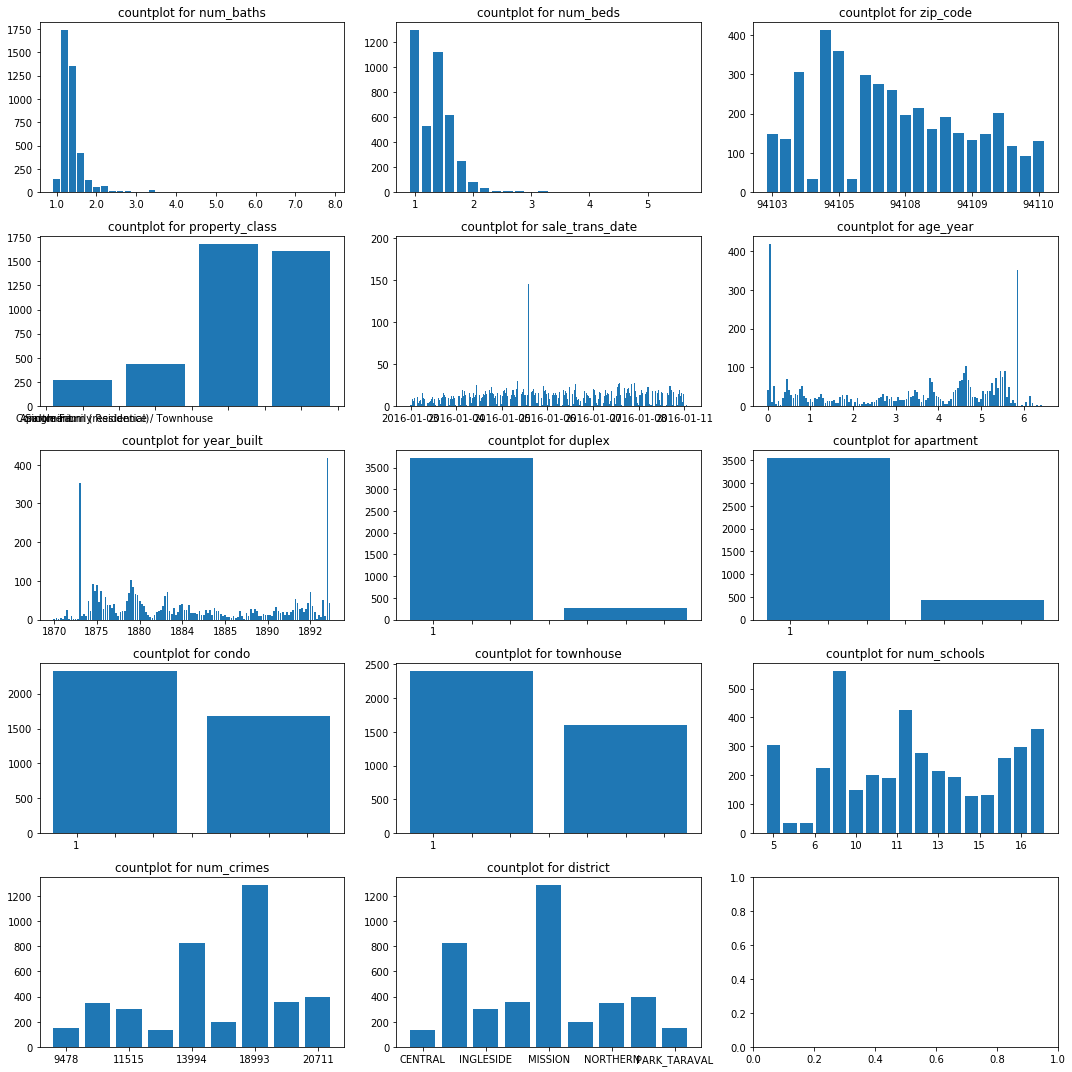

In [72]:
# plot categorical/discrete numeric cols
num_cat = len(cat_cols)
ncols = 3
nrows = math.ceil(num_cat/ncols)
cat_fig, cat_axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
for row in range(nrows):
    for col in range(ncols):
        ax = cat_axes[row][col]
        idx = ncols * row + col
        if idx < num_cat:
            counts = init_df[cat_cols[idx]].value_counts().sort_index()
            ind = np.arange(len(counts))
            ax.bar(ind, counts.values)
            ax.set_xticklabels(counts.index.values)
            ax.set_title('countplot for {}'.format(cat_cols[idx]))
plt.tight_layout()

#### Findings from the countplots above. Analysis see below

Q1. age_year might have values of 0?  
Q2. age_year and year_built are duplicates?  
Q3. a property can be duplex, apartment, condo... at the same time?  
Q4: correlation between num_baths & num_beds?

**Q1**

In [73]:
# age_year
init_df.age_year.value_counts().sort_index().head()

-1     42
 0    418
 1     10
 2     51
 3      6
Name: age_year, dtype: int64

In [74]:
# why age_year = -1?
init_df[init_df['age_year']==-1].year_built.values

array([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017])

**=> Answer to Q1: Consider to remove the properties built in 2017**

**Q2**

In [75]:
year_df = init_df[['age_year', 'year_built']]
year_df['calc_age'] = 2016 - year_df['year_built']
year_df['same'] = np.where(year_df['age_year']==year_df['calc_age'], 1, 0)
year_df['same'].value_counts()

1    3997
Name: same, dtype: int64

**=> Answer to Q2:**  
 - **verified: age_year = (2017 - year_built)**    
 - **consider to remove year_built and keep age_year only**

**Q3**

In [76]:
class_df = init_df[['duplex', 'apartment', 'condo', 'townhouse']]
class_df['sum'] = class_df['duplex'] + class_df['apartment'] + class_df['condo'] + class_df['townhouse']
class_df['sum'].value_counts()

1    3997
Name: sum, dtype: int64

**=> Answer to Q3: a property is either duplex or apartment or condo or townhouse**

**Q4**

Text(0,0.5,'num_beds')

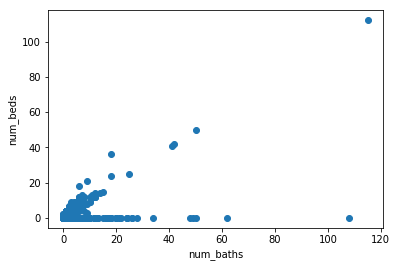

In [77]:
plt.scatter(x=init_df['num_baths'], y=init_df['num_beds'])
plt.xlabel('num_baths')
plt.ylabel('num_beds')

**=> Answer to Q4: no significant correlation between num_baths and num_beds**

### Continuous numeric columns

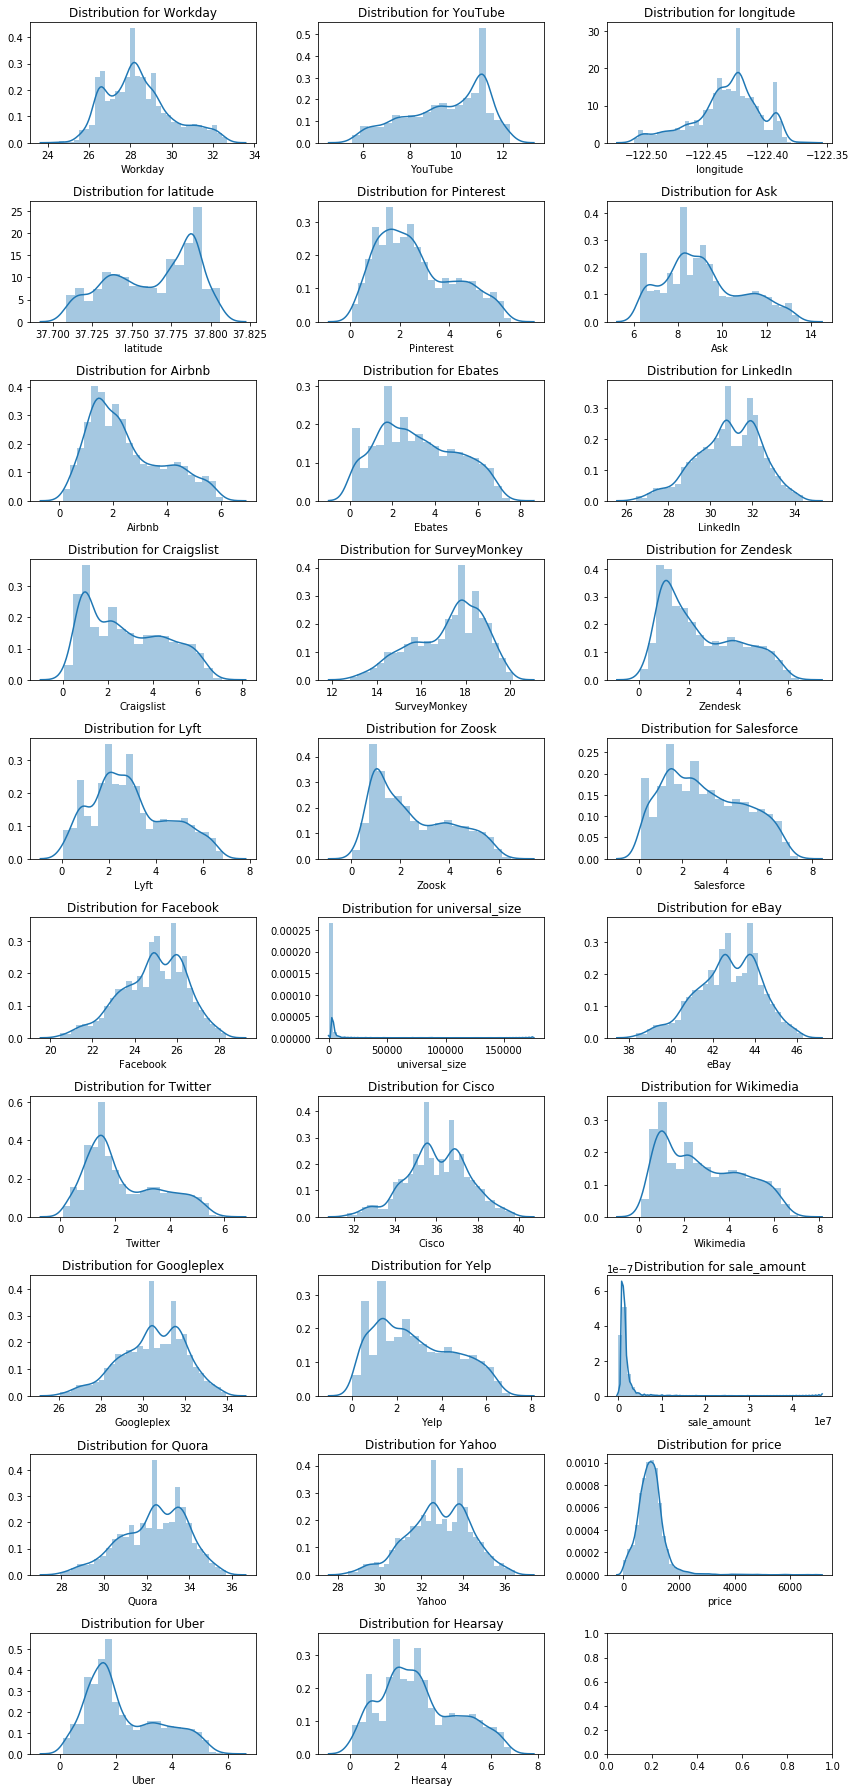

In [78]:
def draw_numeric_plot(init_df, numeric_col,figsize):
    num_numeric = len(numeric_cols)
    ncols = 3
    nrows = math.ceil(num_numeric/ncols)
    numeric_fig, numeric_axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    for row in range(nrows):
        for col in range(ncols):
            ax = numeric_axes[row][col]
            idx = ncols * row + col
            if idx < num_numeric:
                g=sns.distplot(init_df[numeric_cols[idx]], kde=True, label='skewness:%.2f' %
                     init_df[numeric_cols[idx]].skew(), ax = numeric_axes[row][col])
                plt.legend(loc='best', fontsize='large')
    #             ax.hist(init_df[numeric_cols[idx]])
                ax.set_title('Distribution for {}'.format(numeric_cols[idx]))
    plt.tight_layout()

draw_numeric_plot(init_df,numeric_cols,(12,25))

#### Findings from the histograms above. Analysis see below

Q1: price * universal_size = sale_amount?  
Q2: correlation between price & sale_amount, and universal_size & sale_amount?  
Q3: correlation between price & sum distance to all companies?

**Q1**

In [79]:
price_df = init_df[['price', 'universal_size', 'sale_amount']]
price_df['calc_amount'] = price_df['price'] * price_df['universal_size']
# if gap > $10, considered different
price_df['gap_is_small'] = np.where(abs(price_df['calc_amount'] - price_df['sale_amount'])>10, 0, 1)
price_df['gap_is_small'].value_counts()

1    3997
Name: gap_is_small, dtype: int64

**=> Answer to Q1: (price * universal_size) roughly equals to sale_amount, so consider to remove sale_amount**

**Q2**

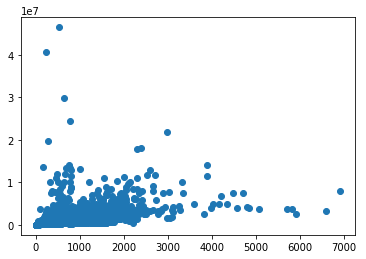

In [80]:
plt.scatter(x=price_df['price'], y=price_df['sale_amount'])

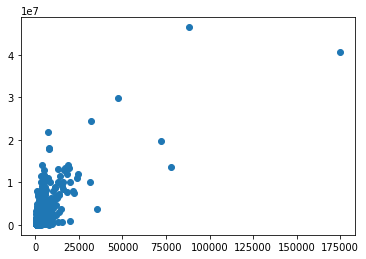

In [81]:
plt.scatter(x=price_df['universal_size'], y=price_df['sale_amount'])

**=> Answer to Q2: no significant correlation between price & sale_amount or universal_size & sale_amount**

**Q3**

In [82]:
company_names = set(numeric_cols).difference(set(['latitude', 'longitude', 'price', 
                                                  'universal_size', 'sale_amount']))
sum_dist = pd.Series(np.zeros(init_df.shape[0]))
for name in company_names:
    sum_dist += init_df[name]

dist_price_df = pd.concat([price_df, sum_dist], axis=1).rename(columns={0:"sum_dist"})
dist_price_df.head()

price  universal_size  sale_amount  calc_amount  gap_is_small  \
0   746.728253            1299       970000     970000.0             1   
1  1093.355761            1189      1300000    1300000.0             1   
2  1036.542516            1423      1475000    1475000.0             1   
3   922.266140            1518      1400000    1400000.0             1   
4   924.491772            1033       955000     955000.0             1   

     sum_dist  
0  325.956399  
1  298.417298  
2  324.903767  
3  314.673066  
4  404.389823

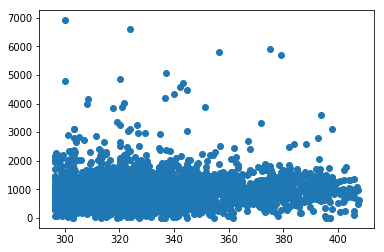

In [83]:
plt.scatter(x=dist_price_df['sum_dist'], y=dist_price_df['price'])

**=> Answer to Q3: no significant correlation between price & sum distance**

### Summary of EDA, Get Clean Data Based On Exploration

1. remove properties built in 2017
2. use `price` as the label, drop `sale_amount`
3. drop `year_built`, keep `age_year`
4. drop `sale_trans_date`
5. calculate weighted average distance all companies, and drop distances to any individual company

In [84]:
# remove properties built in 2017
df_2016 = init_df[init_df['year_built']!=2017]
df_2016.shape

(3955, 43)

In [85]:
# calcultate weighted average distance
df_2016['wei_avg_dist'] = sum_dist
df_2016.head()

num_baths  num_beds   latitude   longitude  zip_code  \
0        0.0         0  37.804640 -122.405206     94111   
1        1.0         1  37.797958 -122.399894     94111   
2        2.0         0  37.803797 -122.404136     94111   
3        2.0         0  37.803797 -122.404136     94111   
4        0.0         0  37.804640 -122.405206     94111   

              property_class sale_trans_date  sale_amount  universal_size  \
0  Condominium (residential)      2016-01-04       970000            1299   
1  Condominium (residential)      2016-01-29      1300000            1189   
2  Condominium (residential)      2016-03-08      1475000            1423   
3  Condominium (residential)      2016-03-21      1400000            1518   
4  Condominium (residential)      2016-03-03       955000            1033   

   year_built      ...           Uber  Wikimedia    Workday      Yahoo  \
0        1993      ...       2.119180   1.072680  27.512888  33.919507   
1        2007      ...       1.601478   0.977182  26.252726  32.066999   
2        1983      ...       1.559842   1.016407  28.069057  34.010578   
3        1983      ...       0.462991   1.618165  28.143432  33.054255   
4        1993      ...       4.866497   5.716206  32.523419  36.314220   

       Yelp    YouTube   Zendesk     Zoosk   Facebook  wei_avg_dist  
0  1.274629  12.252848  1.616944  1.561410  26.244291    325.956399  
1  0.722828  10.719006  1.161564  1.117405  24.363702    298.417298  
2  1.271120  11.765422  1.220212  1.192896  26.247054    324.903767  
3  1.673459  10.108376  0.996814  1.063310  25.155061    314.673066  
4  5.882059  11.255354  5.278324  5.329572  28.177928    404.389823  

[5 rows x 44 columns]

In [86]:
# drop columns
dropped_cols = list(company_names) + ['sale_amount', 'year_built', 'latitude', 'longitude',
                                     'zip_code', 'district','property_class','sale_trans_date']
clean_df = df_2016.drop(dropped_cols, axis=1)
clean_df.head()

num_baths  num_beds  universal_size  age_year        price  duplex  \
0        0.0         0            1299        23   746.728253       0   
1        1.0         1            1189         9  1093.355761       0   
2        2.0         0            1423        33  1036.542516       0   
3        2.0         0            1518        33   922.266140       0   
4        0.0         0            1033        23   924.491772       0   

   apartment  condo  townhouse  num_schools  num_crimes  wei_avg_dist  
0          0      1          0            5       21040    325.956399  
1          0      1          0            5       21040    298.417298  
2          0      1          0            5       21040    324.903767  
3          0      1          0            5       21040    314.673066  
4          0      1          0            5       21040    404.389823

After calculating the weighted distance from company to house, let's look at the relationship between weighted distance and price.

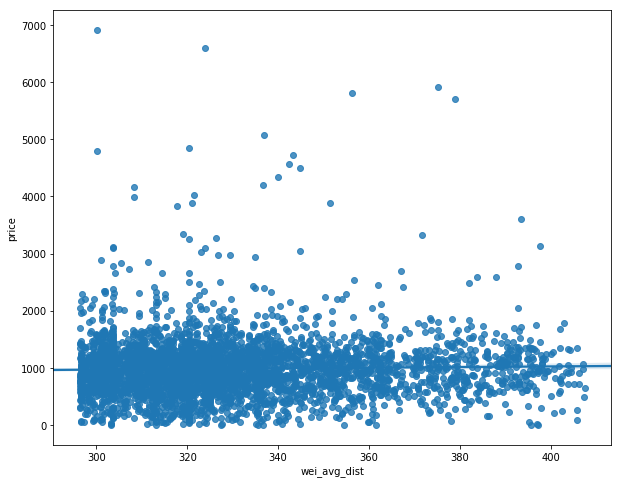

In [87]:
plt.subplots(figsize=(10, 8))  # 设置图形大小
sns.regplot(x=clean_df['wei_avg_dist'], y=clean_df['price'])  # corr()函数计算关联系数，并绘图

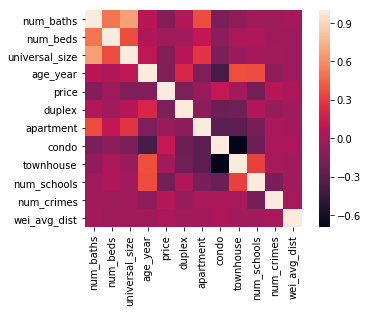

In [88]:
sns.heatmap(clean_df.corr(),square=True)

## Feature Engineering

**Use `clean_df` for the feature engineering**

Thoughts:
1. skewed numeric data -> log transformation, normalization
2. change data type -> numeric data & category data
3. Remove outliers


- Check data type

In [89]:
clean_df.dtypes

num_baths         float64
num_beds            int64
universal_size      int64
age_year            int64
price             float64
duplex              int64
apartment           int64
condo               int64
townhouse           int64
num_schools         int64
num_crimes          int64
wei_avg_dist      float64
dtype: object

In [90]:
def type_transformation(data, dtype):
    """Input:
        data (dataframe): data column that needs to be transformed
        dtype (str): target data type
    """
    for col in data.columns:
        data[col] = data[col].astype(dtype)
    return data

clean_df[['duplex','apartment','condo','townhouse']] = type_transformation(clean_df[['duplex','apartment','condo','townhouse']],'category')

In [91]:
numeric_cols = [x for x in clean_df.columns if clean_df[x].dtypes in ['float64','int64']]
numeric_cols

['num_baths',
 'num_beds',
 'universal_size',
 'age_year',
 'price',
 'num_schools',
 'num_crimes',
 'wei_avg_dist']

In [92]:
# category columns
cat_cols = ['duplex','apartment','condo','townhouse']

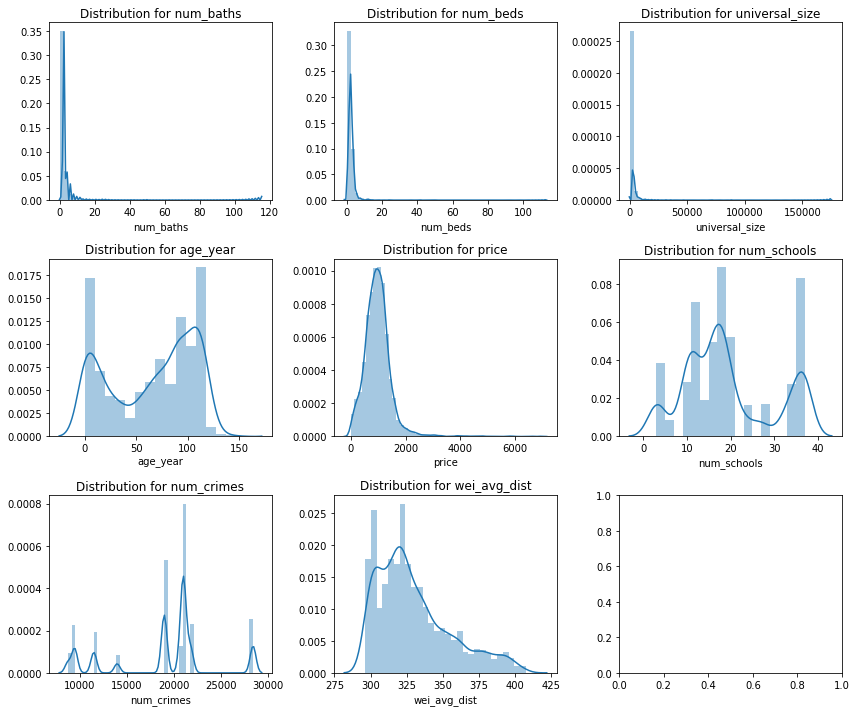

In [93]:
draw_numeric_plot(clean_df,numeric_cols,(12,10))

## Outliers

Remove outliers in `num_baths`, `num_beds` and `universal_size`. Set the `95%` quartile as our threshold

In [94]:
describe_baths = clean_df['num_baths'].describe(percentiles=[0.01,0.05,.95,.99])
describe_beds = clean_df['num_beds'].describe(percentiles=[0.01,0.05,.95,.99])
describe_size = clean_df['universal_size'].describe(percentiles=[0.01,0.05,.95,.99])

threshold_baths = describe_baths['95%']
threshold_beds = describe_beds['95%']
threshold_size = describe_size['95%']

clean_df = clean_df.loc[clean_df['num_baths'] <= threshold_baths]
clean_df = clean_df.loc[clean_df['num_beds'] <= threshold_beds]
clean_df = clean_df.loc[clean_df['universal_size'] <= threshold_size]

print("95% num_baths less than:", threshold_baths)
print("95% num_beds less than:", threshold_beds)
print("95% universal_size less than:", threshold_size)

95% num_baths less than: 5.0
95% num_beds less than: 4.0
95% universal_size less than: 4364.4


In [95]:
print('# samples: %d' % len(clean_df))

# samples: 3619


- Numeric transformation using `log` transformation or `boxcox` transformation

In [96]:
def numeric_normalization(data,method,lam=0.1):
    """
    Input:
        data (dataframe): input dataframe
        lam (float): lambda value for box-cox transformation
        methoe (str): method of numeric transformation
    Output:
        data (dataframe): return a dataframe with tranformed numeric data
    """
    if method == 'log':
        data = np.log((data+0.1)) # a trick to avoid zero value which will crash np.log()
    if method == 'boxcox':
        data = boxcox1p(data,lam)
    return data

In [97]:
clean_df[numeric_cols] = numeric_normalization(clean_df[numeric_cols], 'log')

In [98]:
# check skewness of each numeric data
print(clean_df[numeric_cols].skew())

num_baths        -2.146317
num_beds         -0.627751
universal_size    0.047503
age_year         -1.805834
price            -3.603761
num_schools      -0.960931
num_crimes       -0.988499
wei_avg_dist      0.804919
dtype: float64


- Normalize numeric data into range (0,1)

In [99]:
# def normalization(data):
#     return data/np.sum(data,axis=0)

In [100]:
clean_df.head()

num_baths  num_beds  universal_size  age_year     price duplex apartment  \
0  -2.302585 -2.302585        7.169427  3.139833  6.615835      0         0   
1   0.095310  0.095310        7.080952  2.208274  6.997098      0         0   
2   0.741937 -2.302585        7.260593  3.499533  6.943742      0         0   
3   0.741937 -2.302585        7.325215  3.499533  6.826942      0         0   
4  -2.302585 -2.302585        6.940319  3.139833  6.829352      0         0   

  condo townhouse  num_schools  num_crimes  wei_avg_dist  
0     1         0     1.629241    9.954185      5.787070  
1     1         0     1.629241    9.954185      5.698828  
2     1         0     1.629241    9.954185      5.783837  
3     1         0     1.629241    9.954185      5.751852  
4     1         0     1.629241    9.954185      6.002627

In [101]:
y = clean_df['price']
X = clean_df.drop(['price'],axis=1)

In [102]:
numeric_cols.remove('price')
min_max_scaler = preprocessing.MinMaxScaler()
X[numeric_cols] = min_max_scaler.fit_transform(X[numeric_cols])

In [103]:
print(X.head())

   num_baths  num_beds  universal_size  age_year duplex apartment condo  \
0   0.000000  0.000000        0.604428  0.746181      0         0     1   
1   0.609868  0.645711        0.575534  0.618460      0         0     1   
2   0.774328  0.000000        0.634200  0.795498      0         0     1   
3   0.774328  0.000000        0.655304  0.795498      0         0     1   
4   0.000000  0.000000        0.529607  0.746181      0         0     1   

  townhouse  num_schools  num_crimes  wei_avg_dist  
0         0     0.200562     0.74446      0.299215  
1         0     0.200562     0.74446      0.022393  
2         0     0.200562     0.74446      0.289071  
3         0     0.200562     0.74446      0.188733  
4         0     0.200562     0.74446      0.975430  


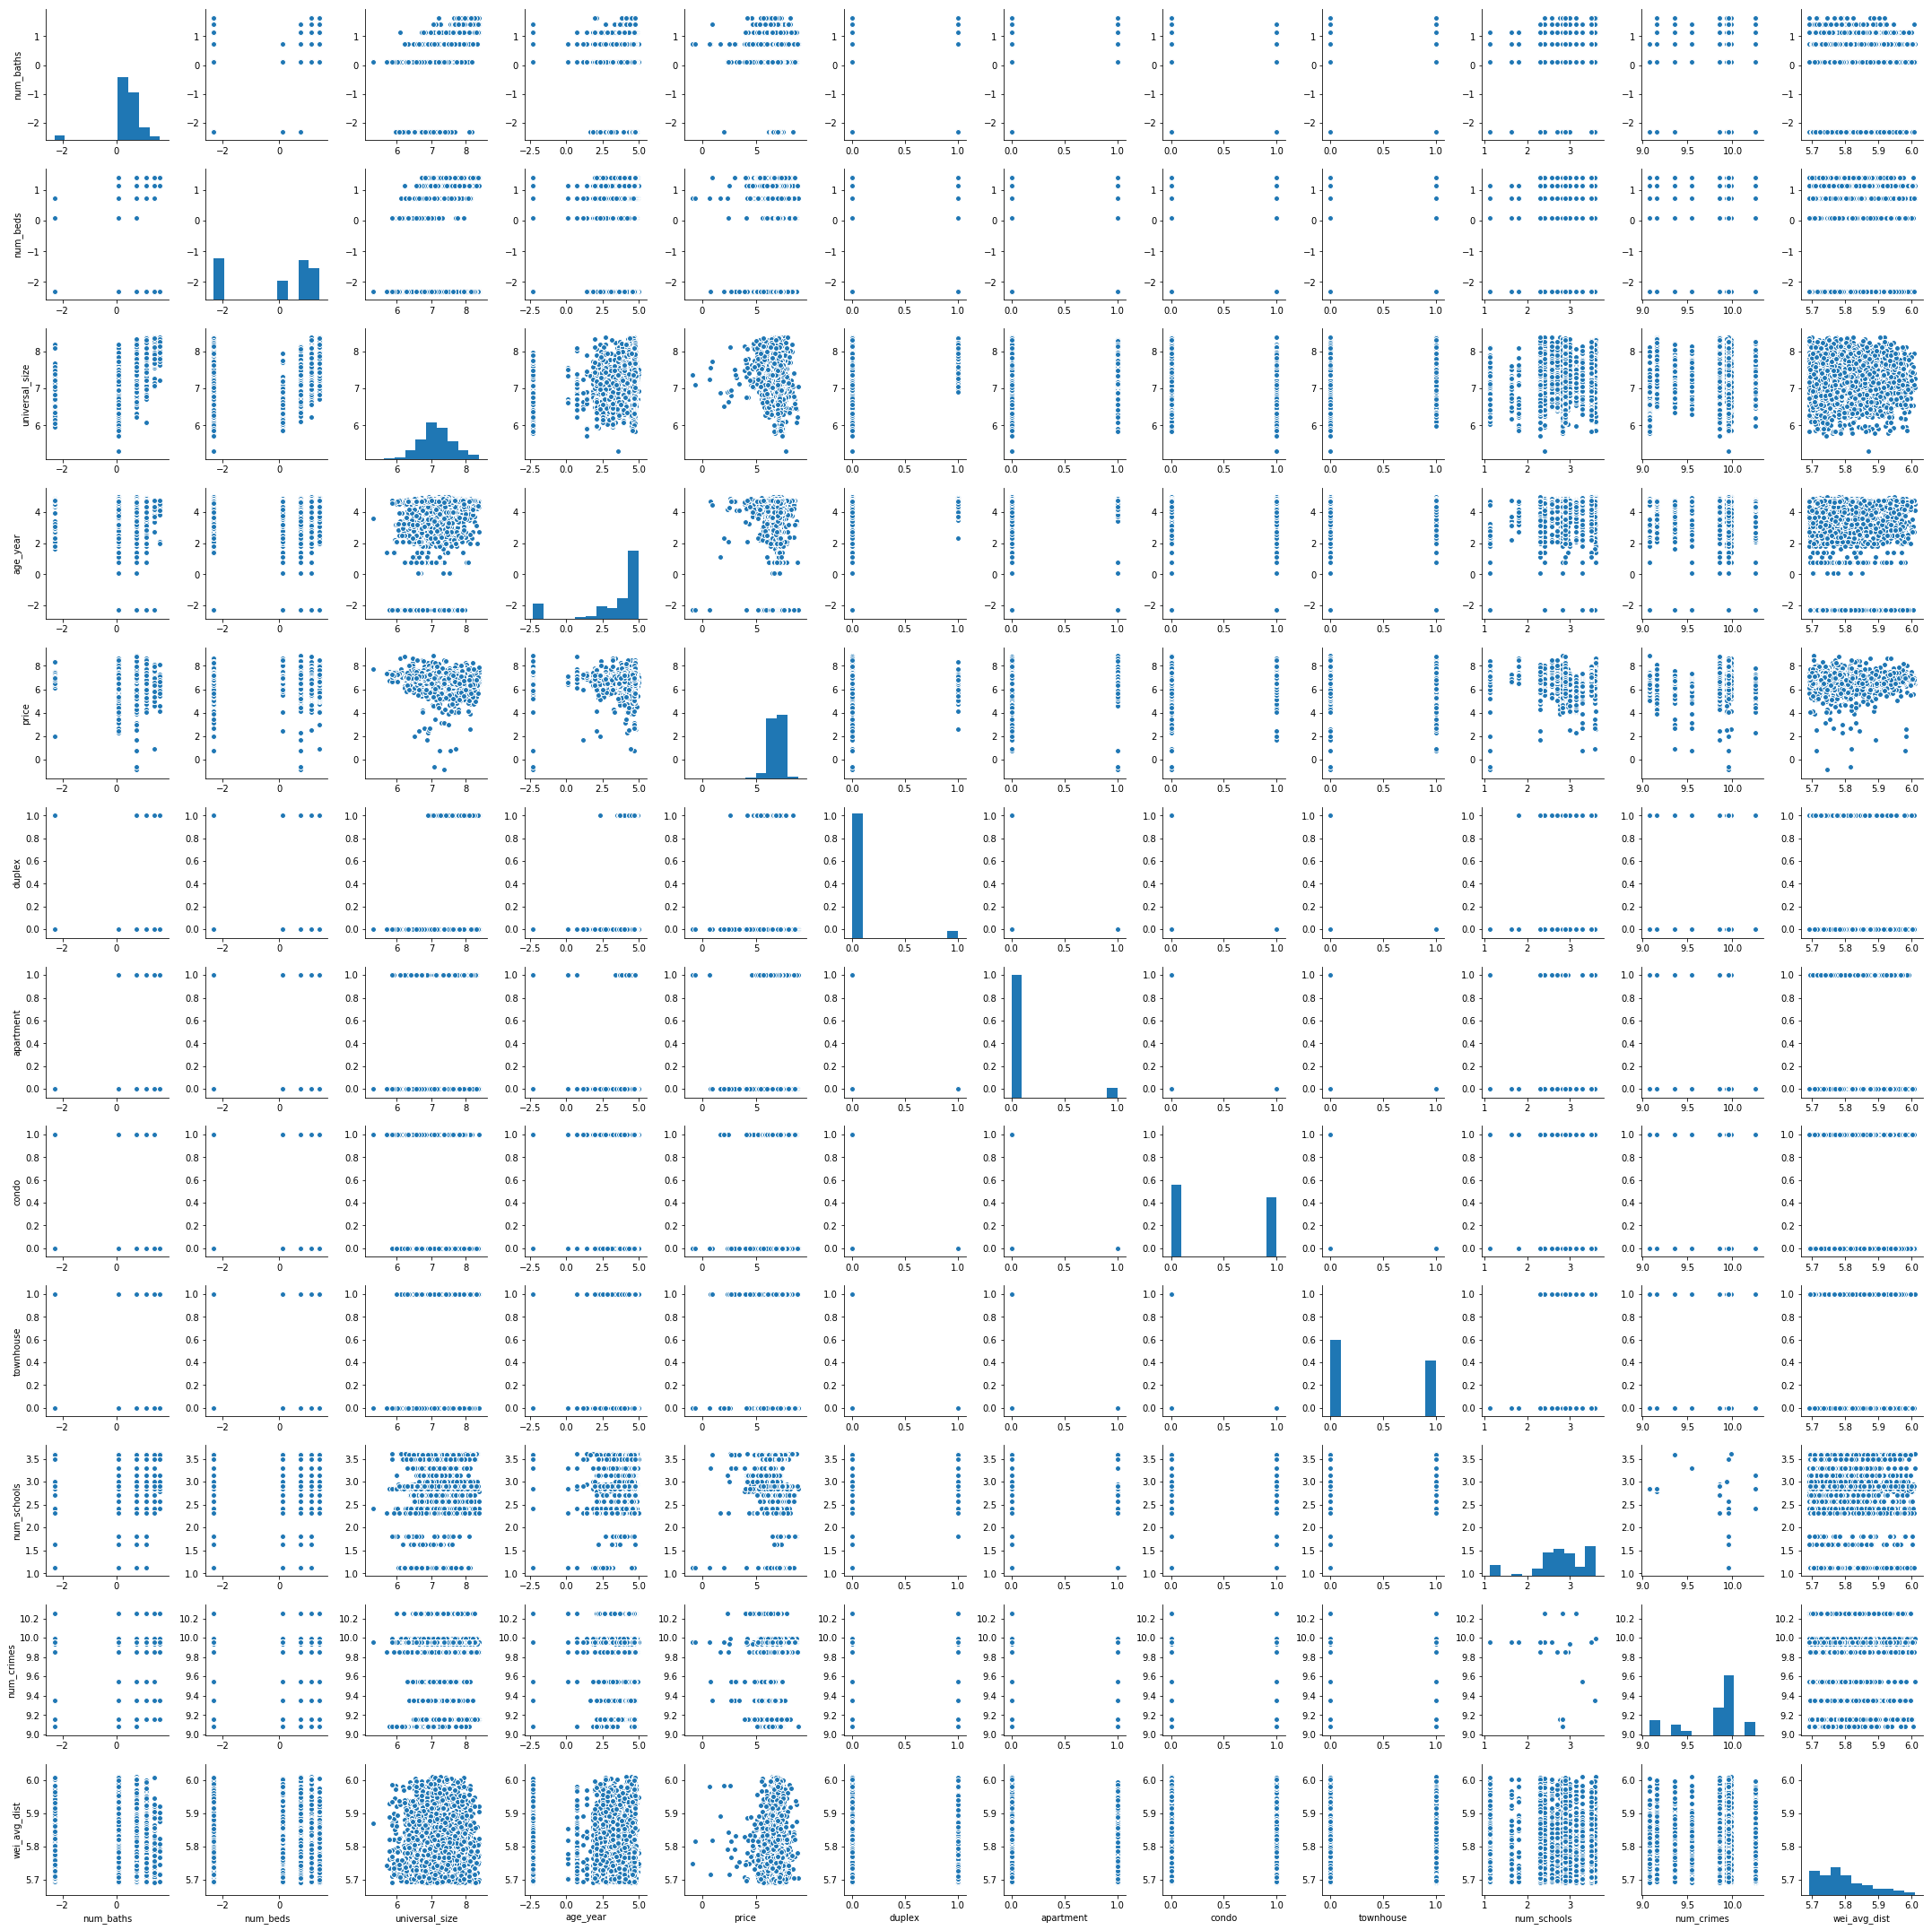

In [104]:
ax = sns.pairplot(clean_df)

In [105]:
print('Toal number of features：%d' % X.shape[1])    

Toal number of features：11


## Models

### Split data into training set and test set

In [106]:
# try to exclude some columns
X_try = X.drop('wei_avg_dist', axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_try, y, test_size=0.33, random_state=7)

### Baseline

In [108]:
# Calculate mean squared error on both the training and validation set
def compute_mse(model, X, y):
    """ Given a linear regression model, calculate the mean squared error for the 
        training dataset, the validation dataset, and for a mean prediction
        Args:
            model (LR_model) : Linear model
            X (array-like) : feature matrix of training data where each row corresponds to an example
            y (array like) : vector of training data outputs 
        Return: 
            MSE of linear regression on the data set    
    """
    y_pred = model.predict(X)
    train_mse = np.mean(np.power(y_pred-y,2))
    return train_mse

In [110]:
# baseline for training data
mean_y_train = y_train.mean()
train_mse_base = np.mean(np.power(mean_y_train - y_train,2))
print("baseline MSE for training data:", train_mse_base)

# baseline for test data
mean_y_test = y_test.mean()
test_mse_base = np.mean(np.power(mean_y_test - y_test,2))
print("baseline MSE for test data:", test_mse_base)

baseline MSE for training data: 0.3601757217582955
baseline MSE for test data: 0.39244650332022646


### Lasso 
**Lasso Linear Regression:**
In order to avoid overfitting, choose Linear Model trained with L1 prior as regularizer -> `lasso` linear model to run regression.   
Use `Learning Curve` to check our regression model.

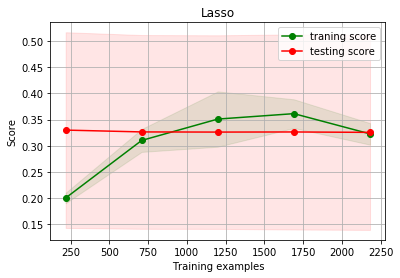

In [111]:
def plot_learning_curve(estimator, title, X, y, cv = 10, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)  
    plt.xlabel('Training examples') 
    plt.ylabel('Score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring="neg_mean_squared_error",
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(-train_scores, axis=1) 
    train_scores_std = np.std(-train_scores, axis=1) 
    test_scores_mean = np.mean(-test_scores, axis=1) 
    test_scores_std = np.std(-test_scores, axis=1) 
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r') 
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') 
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') 
    plt.legend(loc='best')
    return plt

clf = Lasso(alpha=0.0005)
g = plot_learning_curve(clf, 'Lasso', X_train, y_train)  # 调用 plot_learning_curve 绘制学习曲线

In [113]:
clf.fit(X_train, y_train)
lasso_train_mse = compute_mse(clf, X_train, y_train)
lasso_test_mse = compute_mse(clf, X_test, y_test)
print("Lasso MSE for training data:", lasso_train_mse)
print("Lasso MSE for test data:", lasso_test_mse)

Lasso MSE for training data: 0.3228652668695259
Lasso MSE for test data: 0.3606628415561485


### Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
gs = LinearRegression()
gs.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
lr_train_mse = compute_mse(gs, X_train, y_train)
lr_test_mse = compute_mse(gs, X_test, y_test)
print("LR MSE for training data:", lr_train_mse)
print("LR MSE for test data:", lr_test_mse)

LR MSE for training data: 0.32281131993834894
LR MSE for test data: 0.3611164597311545


### RandomForest

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf0 = RandomForestRegressor(n_estimators=10) #oob_score=True
rf0.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [117]:
rf0_train_mse = compute_mse(rf0, X_train, y_train)
rf0_test_mse = compute_mse(rf0, X_test, y_test)
print("RF MSE for training data:", rf0_train_mse)
print("RF MSE for test data:", rf0_test_mse)

RF MSE for training data: 0.08366993207448231
RF MSE for test data: 0.3550118146274987


In [134]:
from sklearn.model_selection import GridSearchCV
param_test1= {'n_estimators':range(5,151,10)} 
# param_test1 = {'max_features':['sqrt','log2']}
gsearch1= GridSearchCV(estimator = RandomForestRegressor(max_features='log2'),  
                       param_grid =param_test1, cv=10)  
gsearch1.fit(X_train,y_train)  
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_  


([mean: 0.15540, std: 0.12800, params: {'n_estimators': 5},
  mean: 0.19938, std: 0.11066, params: {'n_estimators': 15},
  mean: 0.23861, std: 0.06989, params: {'n_estimators': 25},
  mean: 0.25892, std: 0.09343, params: {'n_estimators': 35},
  mean: 0.24901, std: 0.08395, params: {'n_estimators': 45},
  mean: 0.25217, std: 0.08039, params: {'n_estimators': 55},
  mean: 0.25561, std: 0.07420, params: {'n_estimators': 65},
  mean: 0.25944, std: 0.07894, params: {'n_estimators': 75},
  mean: 0.27174, std: 0.08125, params: {'n_estimators': 85},
  mean: 0.25290, std: 0.08412, params: {'n_estimators': 95},
  mean: 0.25595, std: 0.07816, params: {'n_estimators': 105},
  mean: 0.25587, std: 0.09220, params: {'n_estimators': 115},
  mean: 0.26029, std: 0.08314, params: {'n_estimators': 125},
  mean: 0.25300, std: 0.08331, params: {'n_estimators': 135},
  mean: 0.26156, std: 0.08921, params: {'n_estimators': 145}],
 {'n_estimators': 85},
 0.27173928585579671)

In [145]:
rf0 = RandomForestRegressor(n_estimators=85, max_features='log2') #oob_score=True
rf0.fit(X_train, y_train)
rf0_train_mse = compute_mse(rf0, X_train, y_train)
rf0_test_mse = compute_mse(rf0, X_test, y_test)
print("RF MSE for training data:", rf0_train_mse)
print("RF MSE for test data:", rf0_test_mse)

RF MSE for training data: 0.07440827617363982
RF MSE for test data: 0.3195715377297734


In [144]:
rf0 = RandomForestRegressor(n_estimators=85, max_features='sqrt') #oob_score=True
rf0.fit(X_train, y_train)
rf0_train_mse = compute_mse(rf0, X_train, y_train)
rf0_test_mse = compute_mse(rf0, X_test, y_test)
print("RF MSE for training data:", rf0_train_mse)
print("RF MSE for test data:", rf0_test_mse)

RF MSE for training data: 0.07253831100451706
RF MSE for test data: 0.31916263975676834


### Polynomical

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

clf_poly = linear_model.LinearRegression()
clf_poly.fit(X_train_poly, y_train)

clf_poly_train_mse = compute_mse(clf_poly, X_train_poly, y_train)
clf_poly_test_mse = compute_mse(clf_poly, X_test_poly, y_test)
print("Poly MSE for training data:", clf_poly_train_mse)
print("Poly MSE for test data:", clf_poly_test_mse)

Poly MSE for training data: 0.2836921550242113
Poly MSE for test data: 0.33135539307700124
